# Nutrition from Web-Scraped Recipes
### Nema Sobhani and Naomi Goodnight
#### Data Science Tools I: Final Project, Winter 2019

## Dataset and Motivation

**How**  
This data set was collected from web scraping a selection of online cooking websites and associating their ingredients with nutrition data from the USDA's Nutrient Data Library.

**Why**  
We thought that this project demonstrated some proof-of-concept potential in nutritional health and research, presented a pop-culture focus, and was both challenging and fun.

**Meta Data**
- Scraped Data
    - This dataset started its life on various recipe database websites.  Through webscraper code, utilizing BeautifulSoup and open source code as a base, the initial csv of 155,876 lines listed the url, recipe title, total time, and each ingredient as a separate column.  Recipe titles or ingredients which internally contained commas were surrounded by double quotes.  However, as a result of the data's orgin on websites, significant data cleaning was needed.

- USDA Nutrition Data 
    - These internally consistent data files contained most major food items in the American diet, along with common nutrition markers and experimental/analytic data.
    - Typical attributes include:
        - Food group
        - Name
        - Preparation
        - Nutrient data / 100 grams (Calories, Protein, Carbs, Fat, etc.)
        


## Task Definition/Research Question

For culinary websites looking to capture someone who shifts away from prepackaged foods with clearly-labeled nutritional content, especially with cook-it-yourself meal-delivery services growing in popularity, the need to appeal to home-cooking has created demand to provide nutritional content to consumers. 

To close these gaps, **we developed an automated process to return nutritional information from an input of raw web scraped recipe data**. This would allow websites to update their entire catalog of recipes to include nutritional data from the USDA and offer a significant advantage in the growing market for home cooking. 

This would also allow the website to conduct broad surveys of tendencies in nutritional content, ingredient frequencies, and health trends. 

<br>
  
**Future Directions**  
As we enter our next phase, there are several areas of interest that could be incorporated into our project to both increase its accuracy and widen its scope. One focus would be to scrape more attributes, particularly location data, insights into ethnic cuisine and serving size. Incorporating machine learning techniques would offer the ability to create generic grocery lists based on a unique profile of a site. Natural language processing could be leveraged to more accurately determine the ingredients based on n-gram frequency. Visualizing popular recipes and ingredients by site, using word clouds, offers a custom representation of a website's culinary focus and style which carries innate marketing value.

## Literature Review

**Fitness Trackers**  
Mobile applications such as ["MyFitnessPal"](https://www.myfitnesspal.com/) are consumer level calorie-counting applications that require manual input of food items in order to retrieve nutritional data. Our application is distinct from these, since it is geared towards producers (food websites) it does not require any input from consumers. Our program would be ideal for recipe websites as it could be developed to interface with fitness apps and transfer all nutritional information to the user, removing the need for manual entry. 


**Geographic/Cultural Food Association**  
There is a [**_Kaggle_** competition](https://www.kaggle.com/c/whats-cooking) in which a list of ingredients, provided via [**_Yummly_**](https://www.yummly.com), is used to predict the ethnicity of that dish. This is similar to some of the word matching and recognition done in  our project, but they differ in that the competition criteria  has a machine learning bent, to determine the ethnic origin of a dish using keywords. Our project focused on actual matching of the ingredients to the USDA nutrition database in order to extract nutritional content. Beyond this, the Kaggle competition used thoroughly cleaned data from only one site through an API. Ours is intended to be used with almost any recipe website and handle raw html data and return nutrition data.  

## Quality of Cleaning

### 1. Web Scraping

**Web Scraping**
<p>The initial webscraping origin began from <i>BS.py</i>.  This program went to the search page of several promient recipe website search pages (e.g., <a href="https://www.epicurious.com/search?content=recipe">Epicurious</a>) and scraped the links of each recipe and saved the resultant links in a file.  The second stage webscraper, <i>RScrape.py</i>, utilized additional open source code, <a href='https://github.com/hhursev/recipe-scrapers'>recipe_scrapers</a>).  The data from this stage was saved in the 150k+ csv file, <i>recipe_output.csv</i>.  Several fields included an internal comma and were thus surrounded by double quotes.  Future interations would either surround all fields with double quotes or use a unique field separator as the variability caused complexity in later phases.  An example line follows:
<p><ul>http://bbc.co.uk/food/recipes/awarmsaladofasparagu_67967, "A warm salad of asparagus, field mushrooms and fresh peas",30,"20 medium asparagus spears, trimmed and peeled","175g/6oz shelled young peas","4 tbsp extra virgin olive oil","1 clove garlic, mashed to a paste with a little salt","8 small field mushrooms, stalks removed and peeled","salt and ground black pepper","1 ciabatta loaf, cut into two horizontally then in two from top to bottom","1 shallot, finely chopped","3 tbsp dry vermouth","55g/2oz unsalted butter, cubed","1 tbsp chopped flat-leaf parsley","1 tbsp snipped chives","1 tsp chopped tarragon","1 tbsp freshly squeezed lemon juice","30g/1oz each rocket and watercress leaves",</ul>

**Data Cleaning**
<p>Once the web scraping was complete, the large task of cleaning the data remained.  This was done with a combination of bash scripting and python scripting (with and without pandas), _Cleaning.py_.  Several of the steps involved removal of data, on future iterations of this project more careful analysis would need to be done.  Examples of issues follow.

 - Lines without ingredients (likely a web scraper issue)
 - Duplicated lines (likely due to web scraper timeout and restart)
 - Lines with duplicate ingredients (website display issue)
 - Ingredient fields with instructions included
   - "6 medium red onions (about 7 ounces each), peeled, cut vertically into 6 wedges to within 1/2 inch of bottom"
   - "4 cups any combination of fresh berries, picked over, washed, hulled, if necessary, and drained until dry, and/or cut-up peeled fresh fruit, divided (1 1/2 cups and 2 1/2 cups), (Note: try blueberries and peaches, or raspberries and nectarines, or blueberries and strawberries, or plums and peaches with Marionberries or huckleberries; do not peel plums, nectarines or pears)"



### 2. USDA Nutrition Retrieval
**Data Cleaning / Transformation**  
First, raw scraped data is split and all newlines and empty elements are removed. Second, each individual ingredient line is parsed to determine weight and quantity, using a mix of numeric parsing and keyword location for weight measurements (g, ml, tbsp, ounce, cup, etc). Third, the ingredient line is truncated to remove numerics, measurements, and stop words, which allows careful text matching in the USDA food description file. Fourth, a match is made to the USDA word description file, utilizing a heuristic to determine the ingredient similarity between both data sets.  Fifth, the USDA nutritional data file is accessed by food ID, where all data is retrieved (calories, protein, fat, carbs, etc).

**Unusual Incidents**  
There were many edge cases that come up in parsing numeric descriptors. Two, six and a half ounce steaks may be written in many ways. For example:
- 2 6 1/2 ounce steaks
- 2, 6½ ounce steaks
- 2 6 ½ oz. steaks  

Parsing this was tricky, and many edge cases were defined in order to handle unusual ascii unicode, as well as to parse between quantities and weights.  
<br>
Another error-prone issue that has come up regularly that we have not been able to fully control is mis-matching of food descriptions. We used the heuristic that states, **_"the correct item is the one that (1) contains the highest number of word matches and (2) has the shortest character length if there is a tie."_**. This heuristic isn't always necessarily correct! Often there would be an incorrect match that satisfies the heuristic properties. For example, _"1 clove of garlic"_ may either match with _"garlic, raw"_ or _"clove, spice"_ in the USDA nutrition database, leading to a possible error.

**Missing Values**  
Due to the nature of the USDA nutritional data, if a value was not included, it means that it was not measured. These were stored in the dataframe as 'NaN' and were not included in analysis. If it was measured and it was 0, it was included.  

## Stats and Interpretation

### 1. Web Scraping

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
from NG_analysis import *

As each ingredient needs to pass through the complex nutritional program, the total number of ingredients is extremely important when determining the run time.

In [2]:
df_high_level

NumRecipes     133648
NumIngr       1452802
dtype: int64

In [3]:
#The top 20 websites
wb_topsum

,NumRecipes,AveNumIngr
Website,,
tastykitchen,39387,10.129383
epicurious,33828,9.758218
foodnetwork,13957,12.386258
bonappetit,12464,10.642089
cookstr,7009,10.277786
foodrepublic,3617,11.704451
food,2429,12.484562
finedininglovers,1844,11.404555
whatsgabycooking,1161,11.171404


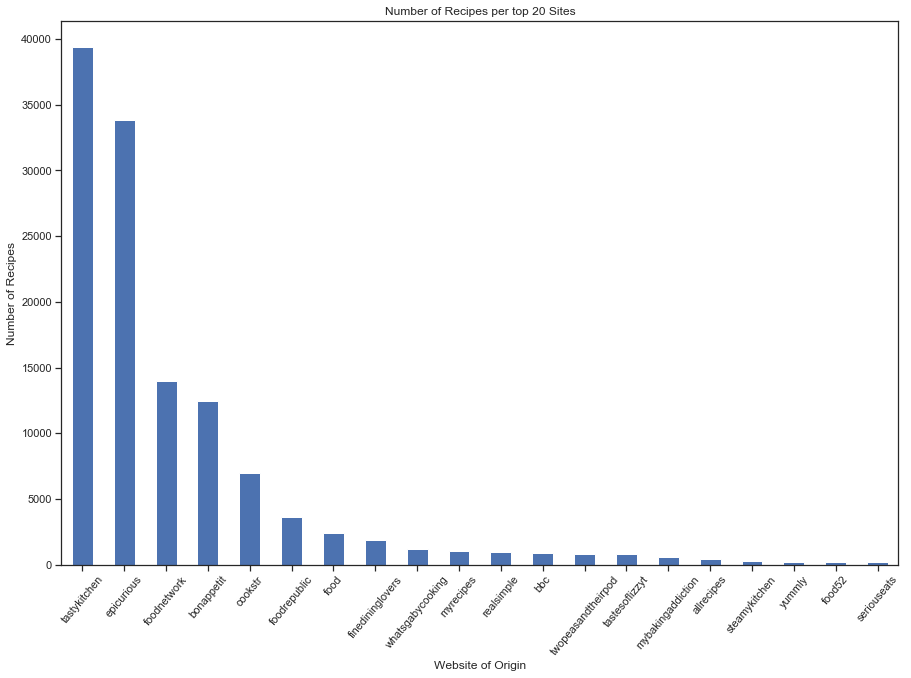

In [4]:
plt.figure(figsize=(15,10))
wb_topsum.NumRecipes.sort_values(ascending=False).plot.bar()

plt.xticks(rotation=50)
plt.title('Number of Recipes per top 20 Sites')
plt.xlabel("Website of Origin")
plt.ylabel("Number of Recipes")
plt.show()

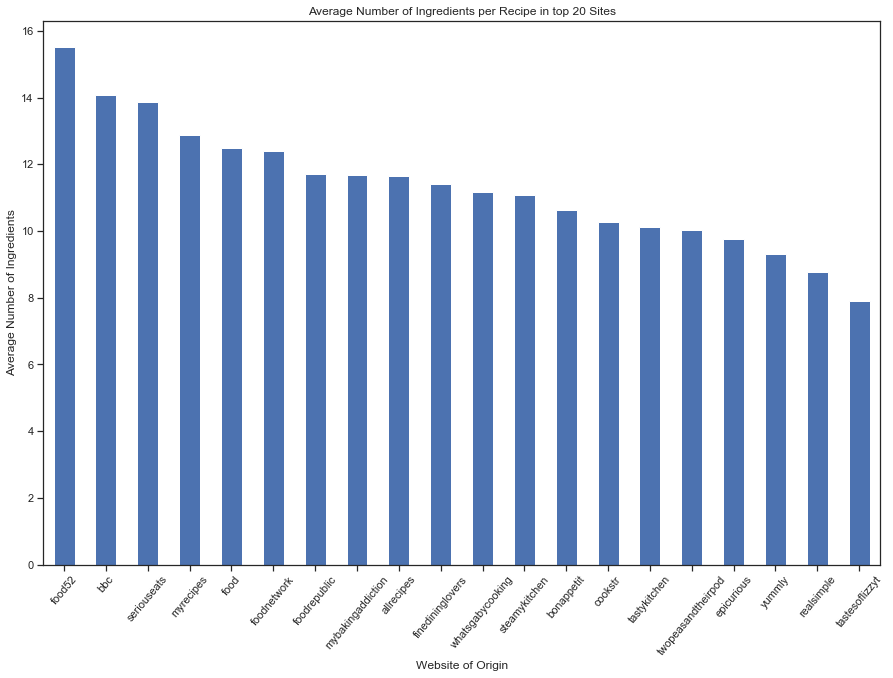

In [5]:
plt.figure(figsize=(15,10))
wb_topsum.AveNumIngr.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Average Number of Ingredients per Recipe in top 20 Sites')
plt.xlabel("Website of Origin")
plt.ylabel("Average Number of Ingredients")
plt.show()

In [6]:
#The top words by frequency within the recipe titles
wordfreq_Title.head(20)

with         34490.0
and          29750.0
chicken      10901.0
chocolate     6861.0
sauce         6502.0
salad         6159.0
cream         4526.0
cheese        4353.0
potato        4260.0
cake          4230.0
cookies       3760.0
grilled       3689.0
butter        3658.0
roasted       3542.0
pork          3318.0
pie           3045.0
a             3033.0
lemon         2978.0
beef          2904.0
bread         2821.0
dtype: float64

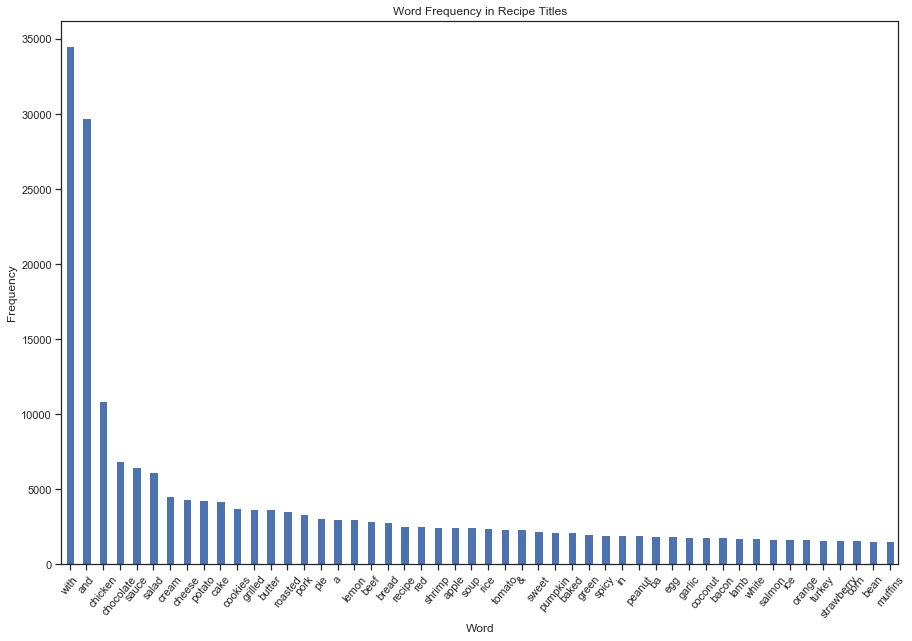

In [7]:
plt.figure(figsize=(15,10))
wordfreq_Title.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency in Recipe Titles')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [8]:
#The same set but from the ingredients has a different distribution
wordfreq_Ing.head(20)

2              242633.0
cup            225307.0
cups           156501.0
tablespoons    138902.0
teaspoon       135479.0
1/2            125736.0
chopped        105824.0
salt           100182.0
teaspoons       86192.0
and             82910.0
3               80742.0
fresh           80232.0
½               77353.0
oil             74844.0
tablespoon      74283.0
pepper          73183.0
or              72234.0
sugar           70703.0
1/4             67256.0
4               63971.0
dtype: float64

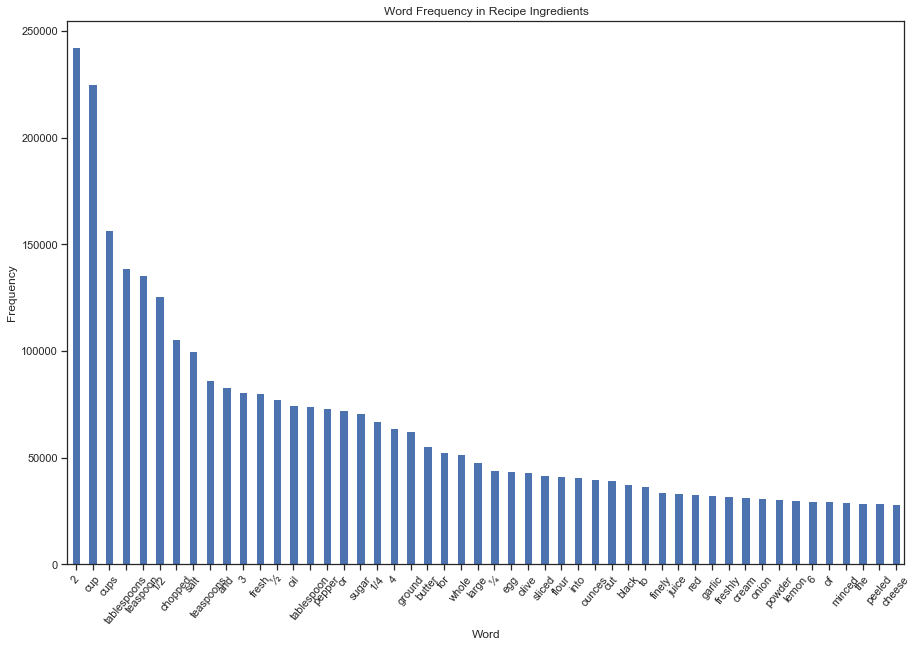

In [9]:
plt.figure(figsize=(15,10))
wordfreq_Ing.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency in Recipe Ingredients')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

There are a lot of high frequency, irrelevant words. Without stopwords the list is much more interesting.

In [10]:
wordfreq_Title_wo_stop.head(20)

chicken      10901.0
chocolate     6861.0
sauce         6502.0
salad         6159.0
cream         4526.0
cheese        4353.0
potato        4260.0
cake          4230.0
cookies       3760.0
grilled       3689.0
butter        3658.0
roasted       3542.0
pork          3318.0
pie           3045.0
lemon         2978.0
beef          2904.0
bread         2821.0
red           2518.0
shrimp        2475.0
apple         2468.0
dtype: float64

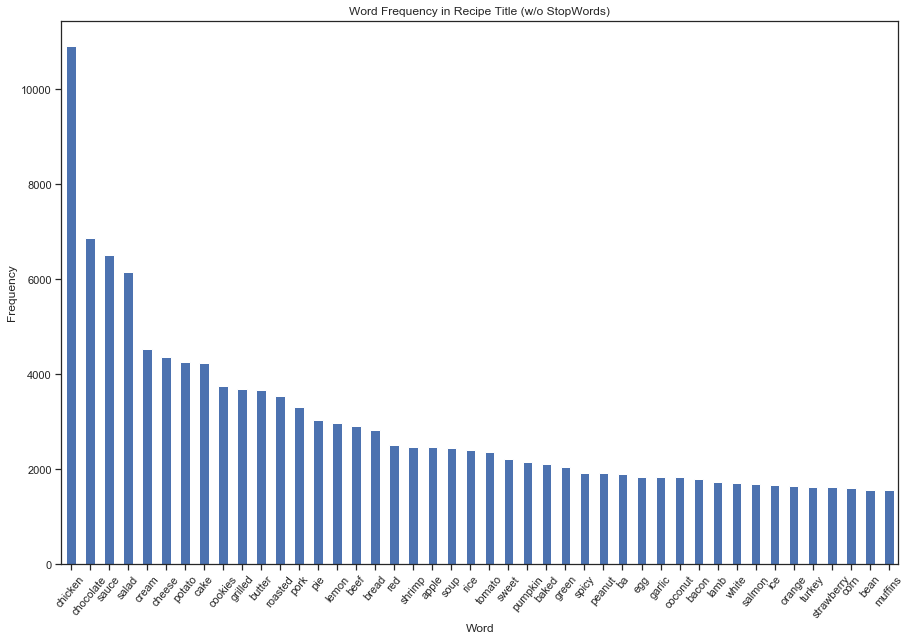

In [11]:
plt.figure(figsize=(15,10))
wordfreq_Title_wo_stop.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency in Recipe Title (w/o StopWords)')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [12]:
wordfreq_AggIng_wo_stop.head(20)

chopped    105824.0
salt       100182.0
fresh       80232.0
oil         74844.0
pepper      73183.0
sugar       70703.0
butter      55361.0
egg         43727.0
olive       43489.0
sliced      42006.0
flour       41297.0
cut         39316.0
black       37469.0
juice       33348.0
red         33175.0
garlic      32566.0
cream       31758.0
onion       31042.0
powder      30507.0
lemon       30210.0
dtype: float64

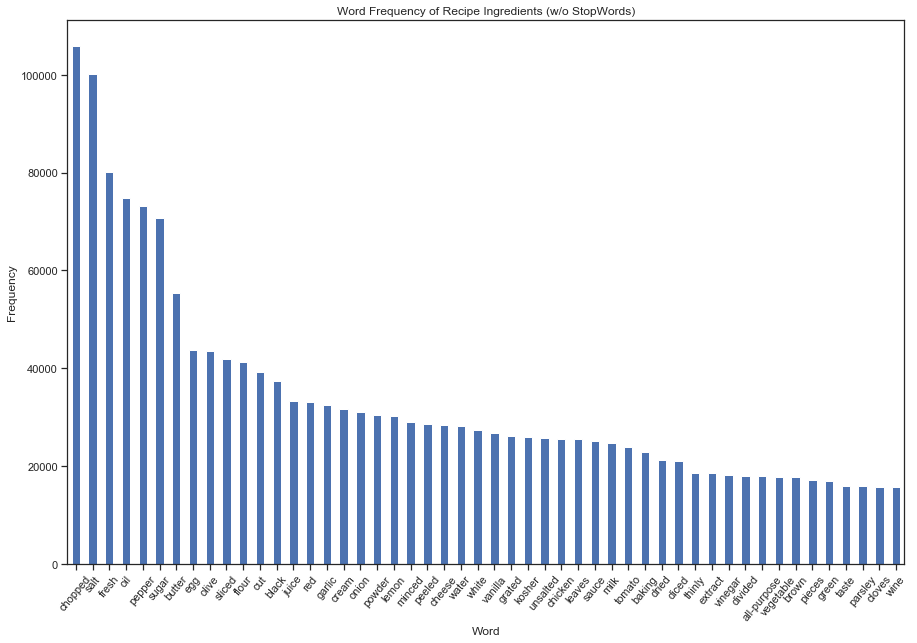

In [13]:
plt.figure(figsize=(15,10))
wordfreq_AggIng_wo_stop.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency of Recipe Ingredients (w/o StopWords)')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

Looking through the high frequency words in the ingredient list, there are several more stopwords which could be added if one wanted to see only ingredients. It is important to note that these single word frequencies falsely correlate some ingredients, such as bell pepper and black pepper. In future iterations of this project, the concept of bigrams would be explored to get more accurate analysis.

In [14]:
wordfreq_AggIng_wo_extra.head(20)

salt       100182.0
oil         74844.0
pepper      73183.0
sugar       70703.0
butter      55361.0
egg         43727.0
olive       43489.0
flour       41297.0
juice       33348.0
garlic      32566.0
cream       31758.0
onion       31042.0
lemon       30210.0
cheese      28436.0
water       28183.0
vanilla     26729.0
chicken     25640.0
milk        24673.0
tomato      23934.0
vinegar     18098.0
dtype: float64

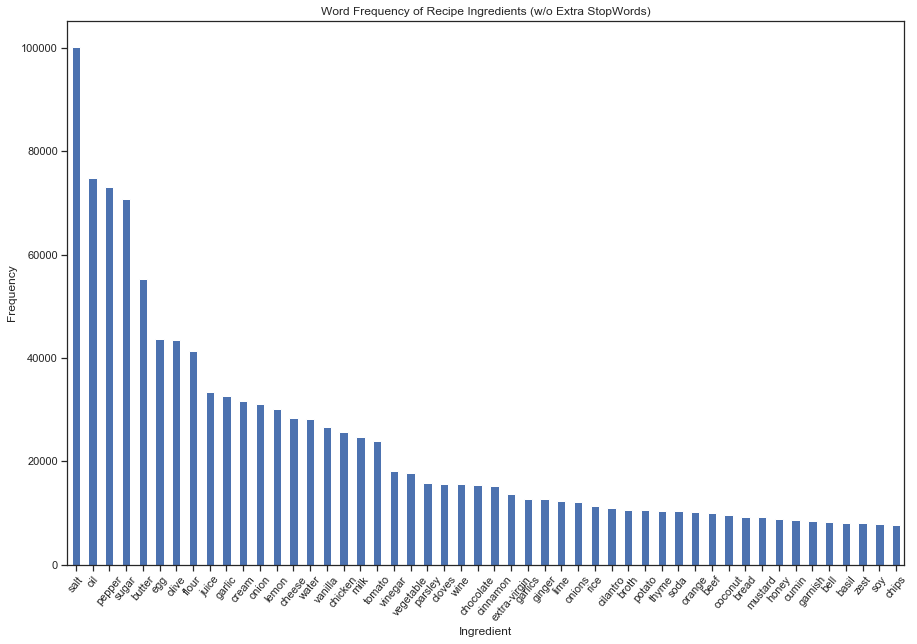

In [15]:
plt.figure(figsize=(15,10))
wordfreq_AggIng_wo_extra.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency of Recipe Ingredients (w/o Extra StopWords)')
plt.xlabel("Ingredient")
plt.ylabel("Frequency")
plt.show()

It may be interesting to view the ingredient frequencies as a proportion over the total number of recipes. For example, salt is an ingredient in about 75% of the scraped recipes.

In [16]:
wordfreq_Ing_prop.head(5)

salt      0.749596
oil       0.560008
pepper    0.547580
sugar     0.529024
butter    0.414230
dtype: float64

### 2. USDA Nutrition

In [1]:
# Analysis tools imported from python script in repository
from NS_analysis import *

# Analytics by Recipe
RecipeAnalyze(analysis=True)

,Mean,Median,Max,Max Recipe
Nutrition,,,,
Calories (kcal),4681.8,3730.0,19546.2,Chocolate Oreo Whoopie Pies
Total Fat (g),223.7,163.4,1065.6,Banana Bars
Saturated Fat (g),85.1,53.6,461.5,Bubble and Squeak with Sausages and Onion Gravy
Trans Fat (g),2.4,0.6,17.2,Caramel Corn Pretzel Cookies
Cholesterol (mg),1356.9,406.4,9696.2,New England-Style Clam Chowder
Sodium (mg),7059.3,5220.0,41314.0,Cold Minted Pea and Buttermilk Soup
Total Carbohydrate (g),486.5,363.7,2215.4,Coconut Shrimp
Dietary Fiber (g),52.7,38.4,252.5,Chocolate Bread Pudding
Sugars (g),163.1,84.3,960.4,Lime Angel Food Cake with Lime Glaze and Pista...


In [2]:
# Analytics by Ingredient
IngredientAnalyze(analysis=True)

,Mean,Median,Max,Max Ingredient
Nutrition,,,,
Calories (kcal),353.077330,159.30000,2220.0000,"3 dried Chinese mushrooms, soaked in warm wate..."
Total Fat (g),11.823488,1.62500,94.5200,A dab of butter
Saturated Fat (g),3.182527,0.28500,30.5625,2 1/2 tablespoons vegetable oil
Trans Fat (g),0.199130,0.12920,0.6460,5 medium free-range eggs
Cholesterol (mg),57.198258,49.84000,172.5000,250g/8¾oz fresh young goats' cheese
Sodium (mg),285.525522,30.00000,2612.0000,"400g/14oz strong cheddar, grated"
Total Carbohydrate (g),30.308622,10.68750,205.2500,"1 ciabatta loaf, cut into two horizontally the..."
Dietary Fiber (g),4.689192,2.97000,21.2500,"5-6 juniper berries, crushed in pestle and mortar"
Sugars (g),8.215546,2.26796,62.7648,3 ounces molasses


In [3]:
# Fun Facts
Factoids()

Here are some fun facts about our processed data!

Pounds of butter: 9,521 

Feet of sausage: 2668 

All of our scraped recipes would feed 252,043 people for 1 day (based on 2,000 Cal diet).
For one individual, that would take 691 years to eat!

Our recipes contain a 253 year supply of protein for a bodybuilder!

Enough garlic to kill 26,381 vampires.



## Visualization

### 1. Web Scraping

Word clouds are a visual way to represent word frequencies.  As you can see from the below word clouds, the ingredient frequencies tend to match the recipe title word frequencies.

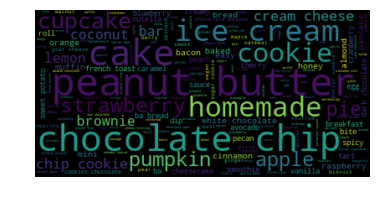

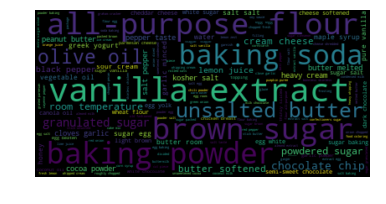

In [21]:
wc('tastykitchen','Title')
wc('tastykitchen','AggIngredients')

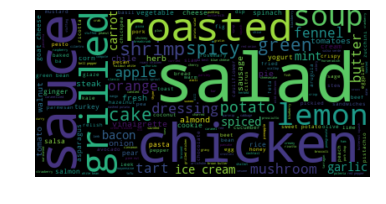

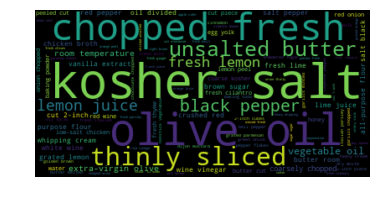

In [22]:
wc('bonappetit','Title')
wc('bonappetit','AggIngredients')

### 2. USDA Nutrition

**Analysis**  
Below are boxen-style plots showing the data grouped by recipe and by ingredient. The plots demonstrate the shape of the distribution for each nutrient, as well as its variation.  
<br>
The plots show that the tendency of the data for each nutrient factor are skewed to the left and closer to 0 than the extremes. In the context of food items and recipes, this makes sense because most foods will have a relatively low average, but occassionally there are foods containing an extreme of a given nutrient. Foods with a low extreme will be closer to the average, since most foods do not have an extreme of any individual nutrient. Also, due to errors in quantity and weight parsing, there are cases in which a food or recipe has exaggerated nutrient values.  
<br>
Outliers were handled in the _"Stats and Interpretation"_ block above. We determined that anything 1.5 interquantile ranges below quantile 0.15 or above quantile 0.85 were outliers, most likely due to parsing errors of quantity and/or weight. When 0.25 and 0.75 were used as quantiles, it removed too many candidates, therefore we adjusted our quantiles to be more inclusive.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'Plotting complete!'

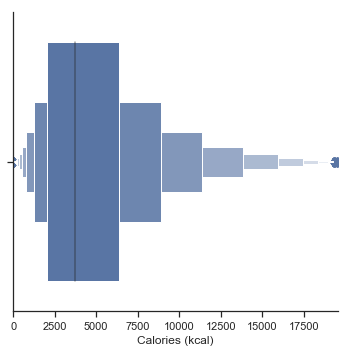

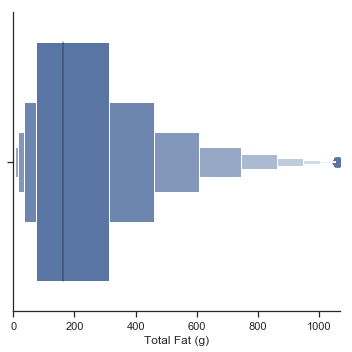

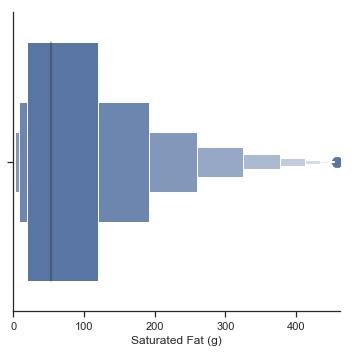

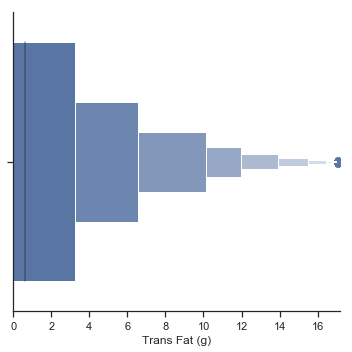

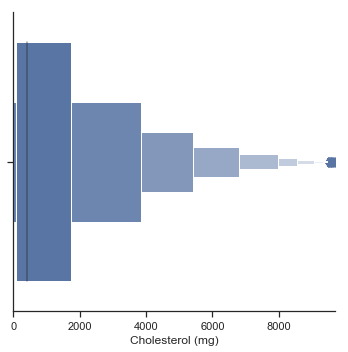

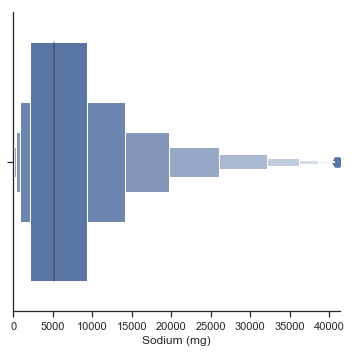

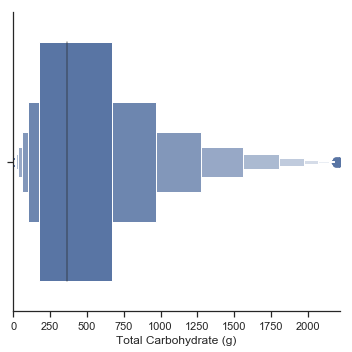

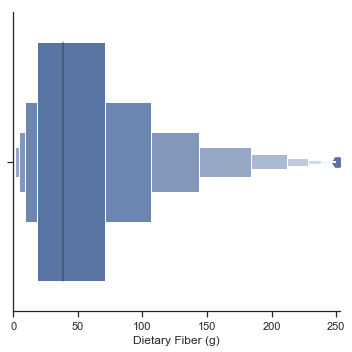

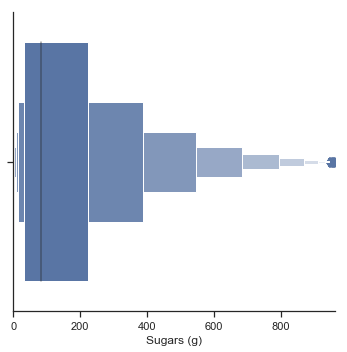

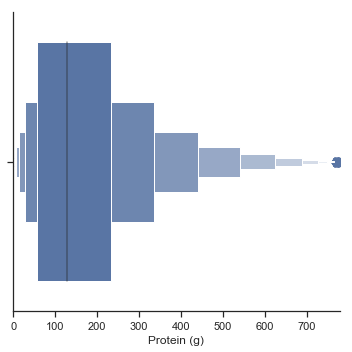

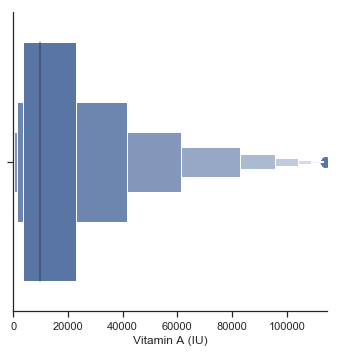

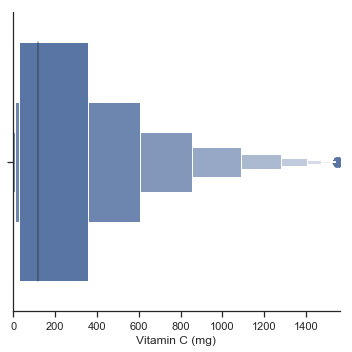

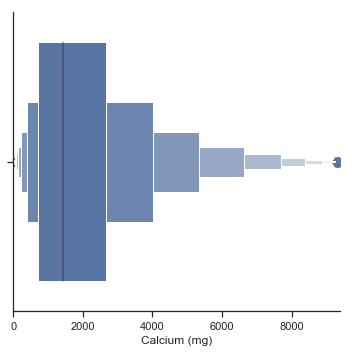

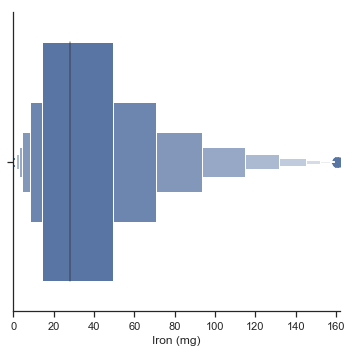

In [4]:
# Visualization by Recipe
RecipeAnalyze(plot=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'Plotting complete!'

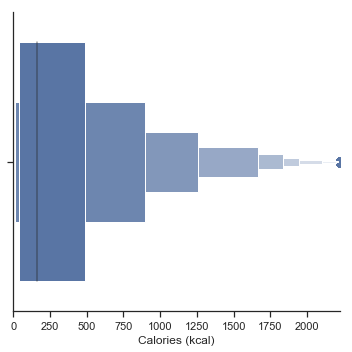

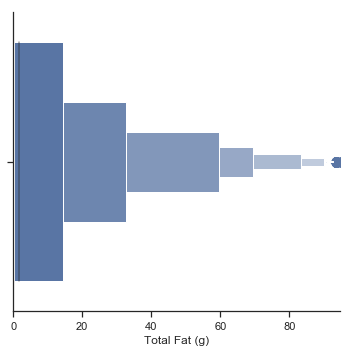

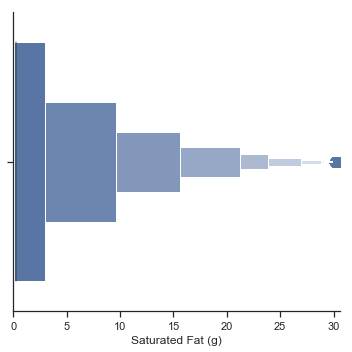

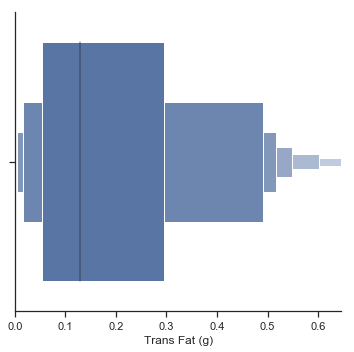

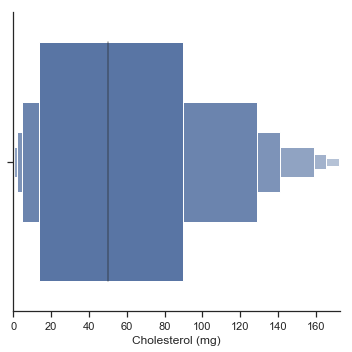

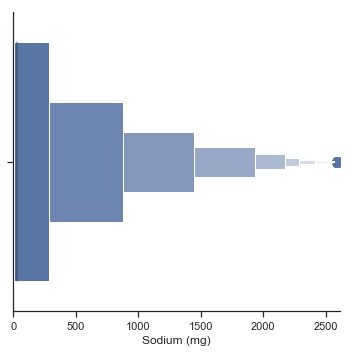

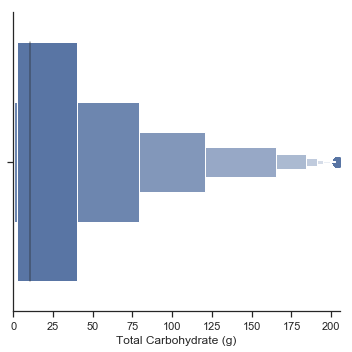

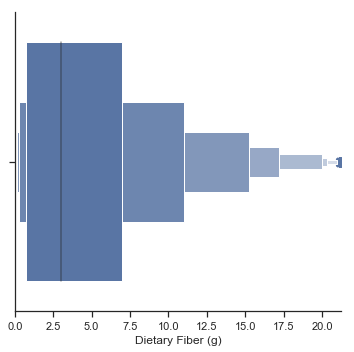

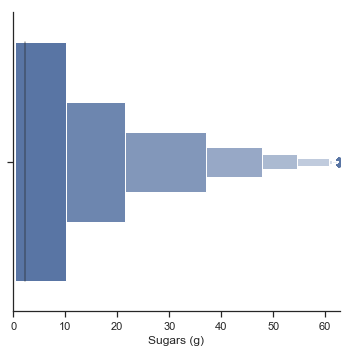

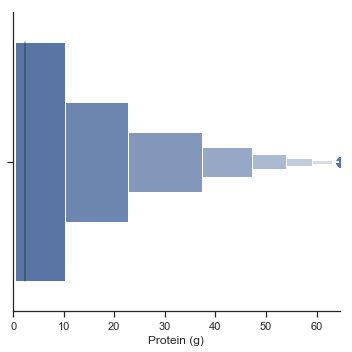

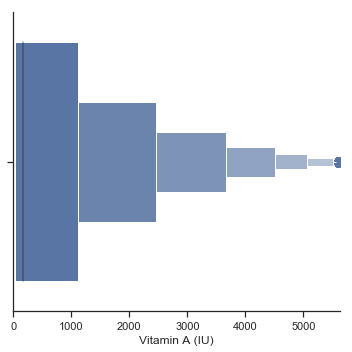

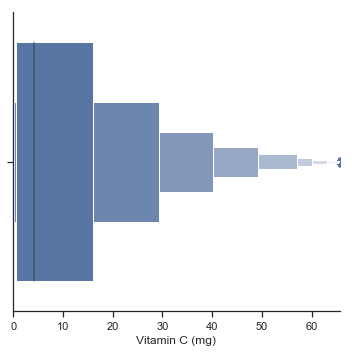

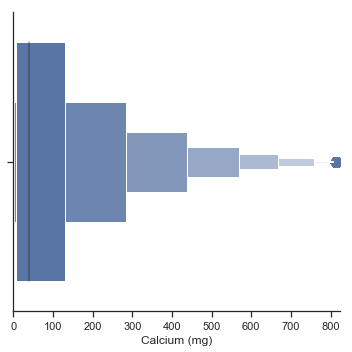

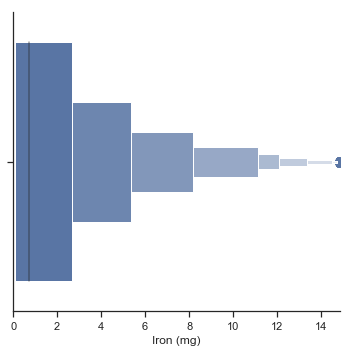

In [5]:
# Visualization by Ingredient
IngredientAnalyze(plot=True)